<a href="https://colab.research.google.com/github/Praewphat/bsc_dpdm22/blob/main/Final_Project66.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import

In [ ]:
import pandas as pd
from google.colab import drive

In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
drive.mount('/content/drive')
path =  '/content/drive/MyDrive/BPDV65'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data1_train = pd.read_csv(os.path.join(path,'churn-bigml-80.csv')) #Os.path.join = path แต่ละอันไม่เหมือนกัน = เชื่อมต่อกันแบบมีส่วนหน้า,หลัง ; Encoding = ภาษาให้เข้าใจง่าย
data2_test = pd.read_csv(os.path.join(path,'churn-bigml-20.csv')) #Os.path.join = path แต่ละอันไม่เหมือนกัน = เชื่อมต่อกันแบบมีส่วนหน้า,หลัง ; Encoding = ภาษาให้เข้าใจง่าย

In [ ]:
data = pd.concat([data1_train, data2_test], axis=0)

- รวมไฟล์ทั้ง 2 แบบไม่ทำอะไรเลย

In [ ]:
data = data.reset_index(drop=True)
data.index = data.index + 1

##Data Prepare

In [ ]:
import numpy as np # linear algebra
from math import * # module math
import matplotlib.pyplot as plt # visualization
from PIL import Image
import seaborn as sns # visualization
import itertools
import io
import plotly.offline as py # visualization
import plotly.graph_objs as go # visualization
from plotly.subplots import make_subplots
import plotly.figure_factory as ff # visualization
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

##Correlations Plot

In [ ]:
#correlation
correlation = data.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array = np.array(correlation)

#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar = dict(title = "Pearson Correlation coefficients", titleside = "right"),
                  )
layout = go.Layout(dict(title = "Correlation matrix",
                        autosize = False,
                        height = 720,
                        width = 800,
                        margin = dict(r = 0, l = 210, t = 25, b = 210),
                        yaxis = dict(tickfont = dict(size = 9)),
                        xaxis = dict(tickfont = dict(size = 9))
                       )
                  )
dataplot = [trace]
fig = go.Figure(data=dataplot, layout=layout)
py.iplot(fig)

###StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

# Copying original dataframe
data1_en_train_SL = data1_train.copy()

scaler = StandardScaler()
num_cols = ['Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge',]
data1_en_train_SL[num_cols] = scaler.fit_transform(data1_en_train_SL[num_cols])
data1_en_train_SL.head()
     

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,1.579670,0.484868,1.579942,-0.058619,-0.050781,-0.058445,0.857403,-0.469031,0.856707,-0.085020,-0.597527,-0.085681,1,False
1,OH,107,415,No,Yes,26,-0.329918,1.135375,-0.330194,-0.095916,0.147654,-0.095397,1.048458,0.149054,1.049293,1.242179,-0.597527,1.242921,1,False
2,NJ,137,415,No,No,0,1.179302,0.685024,1.179465,-1.554439,0.494917,-1.554963,-0.759668,0.200561,-0.758391,0.704125,0.216894,0.698194,0,False
3,OH,84,408,Yes,No,0,2.212509,-1.466653,2.212675,-2.718509,-0.596479,-2.718922,-0.084083,-0.572045,-0.084339,-1.304609,1.031314,-1.307995,2,False
4,OK,75,415,Yes,No,0,-0.235822,0.634985,-0.235772,-1.022461,1.090224,-1.021482,-0.281046,1.076181,-0.281303,-0.049150,-0.597527,-0.045823,3,False


In [ ]:
from sklearn.preprocessing import StandardScaler

# Copying original dataframe
data2_en_test_SL = data2_test.copy()

scaler = StandardScaler()
num_cols = ['Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge',]
data2_en_test_SL[num_cols] = scaler.fit_transform(data2_en_test_SL[num_cols])
data2_en_test_SL.head()
     

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,0.064036,-0.193167,0.064504,2.983872,-1.081478,2.984789,0.324092,-0.501749,0.323581,-0.548297,-0.212747,-0.547714,1,False
1,IN,65,415,No,No,0,-0.934756,1.769398,-0.934501,0.506113,-0.923033,0.505504,0.183311,0.540053,0.185049,0.877350,0.593516,0.877843,4,True
2,NY,161,415,No,No,0,2.739500,-1.665090,2.739121,2.303545,-0.183625,2.302808,-0.786067,1.383417,-0.784675,-1.724455,1.802910,-1.722480,4,True
3,SC,111,415,No,No,0,-1.271894,0.101218,-1.271744,-1.329563,0.080450,-1.329688,-0.202831,0.242395,-0.203735,-0.904709,0.593516,-0.904104,2,False
4,HI,49,510,No,No,0,-1.111438,0.788115,-1.111607,0.236397,0.450154,0.235553,-0.422048,-0.501749,-0.422705,0.307091,-1.422141,0.310260,1,False


- Data 1_en = data1_en_train_SL ที่ไว้เทรน 80% ทำ Dummie
- Data 2_en = data2_en_test_SL ที่ไว้เทส  20% ทำ Dummie

In [ ]:
data1_en_train = pd.get_dummies(data1_en_train_SL, columns=['State','International plan','Voice mail plan'])
# Convert 'True' values to 1 and 'False' values to 0
data1_en_train['Churn'] = data1_en_train['Churn'].astype(int)

In [ ]:
data1_en_train = data1_en_train[['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls', 'State_AK', 'State_AL', 'State_AR',
       'State_AZ', 'State_CA', 'State_CO', 'State_CT', 'State_DC', 'State_DE',
       'State_FL', 'State_GA', 'State_HI', 'State_IA', 'State_ID', 'State_IL',
       'State_IN', 'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD',
       'State_ME', 'State_MI', 'State_MN', 'State_MO', 'State_MS', 'State_MT',
       'State_NC', 'State_ND', 'State_NE', 'State_NH', 'State_NJ', 'State_NM',
       'State_NV', 'State_NY', 'State_OH', 'State_OK', 'State_OR', 'State_PA',
       'State_RI', 'State_SC', 'State_SD', 'State_TN', 'State_TX', 'State_UT',
       'State_VA', 'State_VT', 'State_WA', 'State_WI', 'State_WV', 'State_WY',
       'International plan_No', 'International plan_Yes', 'Voice mail plan_No',
       'Voice mail plan_Yes','Churn']]
data1_en_train.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,State_VT,State_WA,State_WI,State_WV,State_WY,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes,Churn
0,128,415,25,1.579670,0.484868,1.579942,-0.058619,-0.050781,-0.058445,0.857403,...,0,0,0,0,0,1,0,0,1,0
1,107,415,26,-0.329918,1.135375,-0.330194,-0.095916,0.147654,-0.095397,1.048458,...,0,0,0,0,0,1,0,0,1,0
2,137,415,0,1.179302,0.685024,1.179465,-1.554439,0.494917,-1.554963,-0.759668,...,0,0,0,0,0,1,0,1,0,0
3,84,408,0,2.212509,-1.466653,2.212675,-2.718509,-0.596479,-2.718922,-0.084083,...,0,0,0,0,0,0,1,1,0,0
4,75,415,0,-0.235822,0.634985,-0.235772,-1.022461,1.090224,-1.021482,-0.281046,...,0,0,0,0,0,0,1,1,0,0


In [ ]:
data2_en_test = pd.get_dummies(data2_en_test_SL, columns=['State','International plan','Voice mail plan'])
# Convert 'True' values to 1 and 'False' values to 0
data2_en_test['Churn'] = data2_en_test['Churn'].astype(int)

In [ ]:
data2_en_test = data2_en_test[['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls', 'State_AK', 'State_AL', 'State_AR',
       'State_AZ', 'State_CA', 'State_CO', 'State_CT', 'State_DC', 'State_DE',
       'State_FL', 'State_GA', 'State_HI', 'State_IA', 'State_ID', 'State_IL',
       'State_IN', 'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD',
       'State_ME', 'State_MI', 'State_MN', 'State_MO', 'State_MS', 'State_MT',
       'State_NC', 'State_ND', 'State_NE', 'State_NH', 'State_NJ', 'State_NM',
       'State_NV', 'State_NY', 'State_OH', 'State_OK', 'State_OR', 'State_PA',
       'State_RI', 'State_SC', 'State_SD', 'State_TN', 'State_TX', 'State_UT',
       'State_VA', 'State_VT', 'State_WA', 'State_WI', 'State_WV', 'State_WY',
       'International plan_No', 'International plan_Yes', 'Voice mail plan_No',
       'Voice mail plan_Yes','Churn']]
data2_en_test.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,State_VT,State_WA,State_WI,State_WV,State_WY,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes,Churn
0,117,408,0,0.064036,-0.193167,0.064504,2.983872,-1.081478,2.984789,0.324092,...,0,0,0,0,0,1,0,1,0,0
1,65,415,0,-0.934756,1.769398,-0.934501,0.506113,-0.923033,0.505504,0.183311,...,0,0,0,0,0,1,0,1,0,1
2,161,415,0,2.739500,-1.665090,2.739121,2.303545,-0.183625,2.302808,-0.786067,...,0,0,0,0,0,1,0,1,0,1
3,111,415,0,-1.271894,0.101218,-1.271744,-1.329563,0.080450,-1.329688,-0.202831,...,0,0,0,0,0,1,0,1,0,0
4,49,510,0,-1.111438,0.788115,-1.111607,0.236397,0.450154,0.235553,-0.422048,...,0,0,0,0,0,1,0,1,0,0


###รวม Data 80 กับ 20 เข้าด้วยกัน ?

In [ ]:
# data_en = pd.concat([data1_en_test, data2_en_train], axis=0)
# data_en.reset_index(drop=True)
# data_en_X= data_en.drop('Churn',axis=1)
# data_en_Y= data_en['Churn']

#Classifications

##Decision Tree

- 80% train = data1_en_train
  - มี 72 columns
    - เราใช้ 71 columns = X_train 
    - Columns 20 = y_train

- 20% test = data2_en_test
  - มี 72 columns
    - เราใช้ 71 columns = X_test 
    - Columns 72 = y_test

In [ ]:
data1_en_train.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,State_VT,State_WA,State_WI,State_WV,State_WY,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes,Churn
0,128,415,25,1.579670,0.484868,1.579942,-0.058619,-0.050781,-0.058445,0.857403,...,0,0,0,0,0,1,0,0,1,0
1,107,415,26,-0.329918,1.135375,-0.330194,-0.095916,0.147654,-0.095397,1.048458,...,0,0,0,0,0,1,0,0,1,0
2,137,415,0,1.179302,0.685024,1.179465,-1.554439,0.494917,-1.554963,-0.759668,...,0,0,0,0,0,1,0,1,0,0
3,84,408,0,2.212509,-1.466653,2.212675,-2.718509,-0.596479,-2.718922,-0.084083,...,0,0,0,0,0,0,1,1,0,0
4,75,415,0,-0.235822,0.634985,-0.235772,-1.022461,1.090224,-1.021482,-0.281046,...,0,0,0,0,0,0,1,1,0,0


In [ ]:
X_train = data1_en_train.iloc[:,:71] #ดึงข้อมูล 19 คอลัมแรกออกมา 
y_train = data1_en_train.iloc[:,71:] #ใช้คอลัมน์สุดท้ายเป็น y

In [ ]:
X_test = data2_en_test.iloc[:,:71] #ดึงข้อมูล 19 คอลัมแรกออกมา 
y_test = data2_en_test.iloc[:,71:] #ใช้คอลัมน์สุดท้ายเป็น y

###Import

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}


# Create a base model
rf_grids = DecisionTreeClassifier(random_state=7)

# Initiate the grid search model
grid_search = GridSearchCV(rf_grids, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'max_depth': 7}

### Define


- ทดลองใช้ random_state ที่หลายเลขเผื่อเช็คค่าที่ดีที่สุด

In [ ]:
# Create Decision Tree classifer object
clf0 = DecisionTreeClassifier(random_state=2,max_depth=7)

In [ ]:
clf1= DecisionTreeClassifier(random_state=1,max_depth=7)
clf2= DecisionTreeClassifier(random_state=2,max_depth=7)
clf3= DecisionTreeClassifier(random_state=3,max_depth=7)
clf4= DecisionTreeClassifier(random_state=4,max_depth=7)
clf5= DecisionTreeClassifier(random_state=5,max_depth=7)
clf6= DecisionTreeClassifier(random_state=6,max_depth=7)
clf7 = DecisionTreeClassifier(random_state=7,max_depth=7)
clf8= DecisionTreeClassifier(random_state=8,max_depth=7)
clf9 = DecisionTreeClassifier(random_state=9,max_depth=7)
clf10 = DecisionTreeClassifier(random_state=10,max_depth=7)


### Train


In [ ]:
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)
clf5.fit(X_train, y_train)
clf6.fit(X_train, y_train)
clf7.fit(X_train, y_train)
clf8.fit(X_train, y_train)
clf9.fit(X_train, y_train)
clf10.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=10)

###Predict - Evaluate

####Predict

In [ ]:
y_pred_1 = clf1.predict(X_test)
y_pred_2 = clf2.predict(X_test)
y_pred_3 = clf3.predict(X_test)
y_pred_4 = clf4.predict(X_test)
y_pred_5 = clf5.predict(X_test)
y_pred_6 = clf6.predict(X_test)
y_pred_7 = clf7.predict(X_test)
y_pred_8 = clf8.predict(X_test)
y_pred_9 = clf9.predict(X_test)
y_pred_10 = clf10.predict(X_test)

###Evaluate

In [ ]:
print(f"Accuracy of clf1: {accuracy_score(y_test, y_pred_1)}") #This model is da best Accuracy of clf1: 0.9460269865067467
print(f"Accuracy of clf2: {accuracy_score(y_test, y_pred_2)}") 
print(f"Accuracy of clf3: {accuracy_score(y_test, y_pred_3)}")
print(f"Accuracy of clf4: {accuracy_score(y_test, y_pred_4)}")
print(f"Accuracy of clf5: {accuracy_score(y_test, y_pred_5)}")
print(f"Accuracy of clf6: {accuracy_score(y_test, y_pred_6)}")
print(f"Accuracy of clf7: {accuracy_score(y_test, y_pred_7)}")
print(f"Accuracy of clf8: {accuracy_score(y_test, y_pred_8)}")
print(f"Accuracy of clf9: {accuracy_score(y_test, y_pred_9)}")
print(f"Accuracy of clf10: {accuracy_score(y_test, y_pred_10)}")

Accuracy of clf1: 0.9460269865067467
Accuracy of clf2: 0.9415292353823088
Accuracy of clf3: 0.9415292353823088
Accuracy of clf4: 0.9430284857571214
Accuracy of clf5: 0.9445277361319341
Accuracy of clf6: 0.9430284857571214
Accuracy of clf7: 0.9430284857571214
Accuracy of clf8: 0.9445277361319341
Accuracy of clf9: 0.9430284857571214
Accuracy of clf10: 0.9430284857571214


In [ ]:
DT_score = accuracy_score(y_test, y_pred_1)

In [ ]:
print(f'Accuracy DecisionTree', DT_score)

Accuracy DecisionTree 0.9460269865067467


###หน้าตาต้นไม้ Model Clf1

In [ ]:
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import display


In [ ]:
yy = y_test
XX = X_test

In [ ]:
dot_data = export_graphviz(clf1, out_file=None, feature_names=XX.columns, class_names=['no churn', 'churn'], filled=True) #Model 2

In [ ]:
# Create a source object from the DOT data
source = Source(dot_data)

In [ ]:
# Save Picture
source.render("my_tree")

'my_tree.pdf'

## KNN Classifications


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np

###Evaluate with test set


In [ ]:
knn1 = KNeighborsClassifier(n_neighbors=9, weights='distance') 
knn1.fit(X_train,y_train)
yknn_pred1 = knn1.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
# Assume y_true and y_pred are the true and predicted labels, respectively
knn_score = accuracy_score(y_test, yknn_pred1)
# Print the accuracy score
print(" Model KNN n_neighborsne = 9 มีความแม่นยำที่โมเดลทำนาย Churn ของ X_test =", accuracykkn1 )

 Model KNN n_neighborsne = 9 มีความแม่นยำที่โมเดลทำนาย Churn ของ X_test = 0.8590704647676162


- โค้ดนี้เป็นการฝึกและใช้งานโมเดล KNN ด้วยการกำหนด hyperparameters =13 
- ใช้ X_train และ y_train เพื่อฝึกโมเดล 
- ทดสอบโมเดลด้วยชุดข้อมูล X_test และ y_test
- แสดงผลลัพธ์เป็น yknn_pred1 ซึ่งเป็นค่าที่โมเดลทำนาย Churn ของ X_test ออกมาได้

## Navie Bays
- Naive Bayes Classification เป็น Model ใช้ในการแบ่งกลุ่มหรือหาเหตุการณ์ที่จะเกิดขึ้น ซึ่ง Target ของโมเดลจะเพิ่มโอกาสในการเกิดเหตุการณ์เข้าไป

- การปรับปรุงประสิทธิภาพการจัดประเภท คุณสามารถลองใช้ตัวแยกประเภท GaussianNB แทน ซึ่งเหมาะสำหรับข้อมูลที่ต่อเนื่องมากกว่า

In [ ]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, recall_score

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred0 = gnb.predict(X_test)
gnb_score0 = gnb.score(X_test, y_test)
gnb_score0
f1 = f1_score(y_test, y_pred0)
recall = recall_score(y_test, y_pred0)

print("โมเดล GaussianNB ได้ค่าทำนาย =", gnb_score0)
print("F1 ได้ค่าเฉลี่ยของความแม่นยำของการทำนาย =", f1) #(มีค่าระหว่าง 0 ถึง 1 ค่าที่มากกว่าแสดงว่าโมเดลสามารถทำนายได้ดีมากขึ้น)
print("Recall ได้ค่าสัมประสิทธิ์การทำนายความถูกต้องของโมเดล =", recall) #(มีค่าระหว่าง 0 ถึง 1 ค่าที่มากกว่าแสดงว่าโมเดลสามารถทำนายได้ดีมากขึ้น)

โมเดล GaussianNB ได้ค่าทำนาย = 0.5922038980509745
F1 ได้ค่าเฉลี่ยของความแม่นยำของการทำนาย = 0.26881720430107525
Recall ได้ค่าสัมประสิทธิ์การทำนายความถูกต้องของโมเดล = 0.5263157894736842


- เนื่องจากOutput gnb_score1 มีค่าน้อยมาก = 0.636, 63%
- ทำให้ต้องมีการรวิเคราะห์สหสัมพันธ์ : แต่ละรายการกับตัวแปรเป้าหมาย = corr
- มองหา freatures ที่มี corr. กับ target สูงๆ ใช้ทำนายในโมเดลนี้ =
- ["Total day minute"], ["Total Day Charge"], ["Customer Service Call"]

####ปรับปรุงโมเดล Naviy Bay 

In [ ]:
X_train_Corr  = data1_en_train[['Total day minutes','Total day charge','Customer service calls']] # เลือกคอลัมน์ 3 คอลัมน์มาทำ Model เพราะ มีค่า Corr ดีสุด
y_train_Corr  = data1_en_train[['Churn']]
X_test_Corr   = data2_en_test[['Total day minutes','Total day charge','Customer service calls']]
y_test_Corr   = data2_en_test[['Churn']]

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train_Corr, y_train_Corr)
y_pred = gnb.predict(X_test_Corr)

gnb_score = gnb.score(X_test_Corr, y_test_Corr)
f1 = f1_score(y_test_Corr, y_pred)
recall = recall_score(y_test_Corr, y_pred)

print("โมเดล GaussianNB ได้ค่าทำนาย =", gnb_score)
print("F1 ได้ค่าเฉลี่ยของความแม่นยำของการทำนาย =", f1) #(มีค่าระหว่าง 0 ถึง 1 ค่าที่มากกว่าแสดงว่าโมเดลสามารถทำนายได้ดีมากขึ้น)
print("Recall ได้ค่าสัมประสิทธิ์การทำนายความถูกต้องของโมเดล =", recall) #(มีค่าระหว่าง 0 ถึง 1 ค่าที่มากกว่าแสดงว่าโมเดลสามารถทำนายได้ดีมากขึ้น)

โมเดล GaussianNB ได้ค่าทำนาย = 0.8740629685157422
F1 ได้ค่าเฉลี่ยของความแม่นยำของการทำนาย = 0.46835443037974683
Recall ได้ค่าสัมประสิทธิ์การทำนายความถูกต้องของโมเดล = 0.3894736842105263


## สรุปจากการคำนวณความแม่นยำของโมเดล
- Model DecisionTree
ได้ค่า Accuracy เท่ากับ 0.9460269865067467

- KNeighbors
Model ที่ดีที่สุดคือ K=9, weighted='distance' 
ได้ค่า Accuracy เท่ากับ 0.8590704647676162

- NaiveBayes
ได่ค่า Accuracy เท่ากับ 0.8740629685157422

จึงสรุปว่า
เลือกใช้โมเดลที่ดีที่สุดคือ DecisionTree Accuracy ค่า Accuracy เท่ากับ 0.95 หรือ 95%

In [ ]:
print(DT_score, knn_score, gnb_score0)


0.9460269865067467 0.8590704647676162 0.5922038980509745


#Association rules

In [ ]:
!pip install apyori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5976 sha256=93a05d1bfe9ae0d4f07aed3b27933a781177a50507162d704c8fdcaa18619115
  Stored in directory: /root/.cache/pip/wheels/32/2a/54/10c595515f385f3726642b10c60bf788029e8f3a1323e3913a
Successfully built apyori


In [ ]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
1,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
2,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
3,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
4,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
5,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
data["Churn"] = data["Churn"].replace({True: 1, False: 0})
dataAZ1 = data.copy()
dataAZ1['total_call_all_day'] = dataAZ1['Total day minutes'] + dataAZ1['Total eve minutes'] + dataAZ1['Total night minutes']
dataAZ1 = dataAZ1[['total_call_all_day','Churn']]
dataAZ1.head()

,total_call_all_day,Churn
1,707.2,0
2,611.5,0
3,527.2,0
4,558.2,0
5,501.9,0


### แก้ตาราง ทำช่วง นาที

In [ ]:
# create a new column 'total_call_all_day_range'
dataAZ1['total_call_all_day_range'] = pd.cut(dataAZ1['total_call_all_day'], [200, 500, 900], labels=['total_call_all_day 201-500', 'total_call_all_day 501-900'])
# create dummies
dummies = pd.get_dummies(dataAZ1['total_call_all_day_range'])
# concatenate dummies with original dataframe
dataAZ1 = pd.concat([dataAZ1, dummies], axis=1)
dataAZ1 = dataAZ1.drop(['total_call_all_day', 'total_call_all_day_range'], axis=1)
dataAZ1 = dataAZ1[['total_call_all_day 201-500', 'total_call_all_day 501-900','Churn']]

In [ ]:
# ทำ one-hot encoding กับคอลัมน์ 'total_call_all_day'
onehot_data = pd.get_dummies(dataAZ1)

# สร้างกฎโดยใช้ apriori algorithm
frequent_itemsets = apriori(onehot_data, min_support=0.1, use_colnames=True)

# สร้างกฎด้วย association rule
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0)

# แสดงผลลัพธ์
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(total_call_all_day 501-900),(Churn),0.816082,0.144914,0.122712,0.150368,1.03763,0.00445,1.006418
1,(Churn),(total_call_all_day 501-900),0.144914,0.816082,0.122712,0.846791,1.03763,0.00445,1.200440


- antecedents คือ สิ่งที่เป็นก่อนหน้า (antecedent) ใน association rule นั้นๆ ซึ่งอาจเป็นสินค้าหรือคุณลักษณะที่ต้องการตรวจสอบว่าเมื่อมีการเลือกหนึ่งสิ่งนั้น สิ่งอื่นๆ จะเกิดขึ้นตามมา
- consequents คือ สิ่งที่ตามมา (consequent) ใน association rule นั้นๆ ซึ่งอาจเป็นสินค้าหรือคุณลักษณะที่เกิดขึ้นตามจากสิ่งที่เป็นก่อนหน้านั้น
- antecedent support คือ ความน่าจะเป็นของข้อมูลในชุดข้อมูลทั้งหมดที่มีคุณลักษณะตรงกับ antecedents
- consequent support คือ ความน่าจะเป็นของข้อมูลในชุดข้อมูลทั้งหมดที่มีคุณลักษณะตรงกับ consequents
- support คือ ความน่าจะเป็นของข้อมูลในชุดข้อมูลทั้งหมดที่มีคุณลักษณะตรงกับ antecedents และ consequents พร้อมกัน
- confidence คือ ความน่าจะเป็นที่ consequents จะเกิดขึ้น โดยที่ antecedents เป็นจริง คือค่าเฉพาะกัน (support) ของ antecedents และ consequents ที่เกิดขึ้นพร้อมกัน (support) หารด้วยค่า support ของ antecedents

- จะเห็นได้ว่าโอกาสที่ลูกค้าที่มี total_call_all_day อยู่ในช่วง 501-900 จะเป็นลูกค้าที่ยกเลิกบริการ (Churn_1) คือประมาณ 18.40%
- จะเห็นได้ว่าโอกาสที่ลูกค้าที่มี total_call_all_day อยู่ในช่วง 501-900 จะเป็นลูกค้าที่ใช้บริการต่อ (Churn_0) Churn_0 คือประมาณ 81.60% 

##Clustering K-mean

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt


###Prep


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
col_to_drop = ['State', 'Area code', 'Total day charge', 'Total eve charge', 
               'Total night charge', 'Total intl charge']

In [ ]:
data_telcom = data1_train.drop(columns = col_to_drop, axis = 1)
data_telcom_test = data2_test.drop(columns = col_to_drop, axis = 1)


In [ ]:
target_col = ["Churn"]

In [ ]:
#number of levels in feature to be a categorical feature
nlevels = 6

#Separating categorical and numerical columns
#categorical columns
cat_cols = list(set(data_telcom.nunique()[data_telcom.nunique()<nlevels].keys().tolist() 
                    + data_telcom.select_dtypes(include='object').columns.tolist()))
cat_cols = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols = [x for x in data_telcom.columns if x not in cat_cols + target_col]
#Binary columns with 2 values
bin_cols = data_telcom.nunique()[data_telcom.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols:
    data_telcom[i] = le.fit_transform(data_telcom[i])
    data_telcom_test[i] = le.transform(data_telcom_test[i])

#combining the train and test datasets
trainsize = data_telcom.shape[0]
comb = pd.concat((data_telcom, data_telcom_test), sort=False)

#Duplicating columns for multi value columns
comb = pd.get_dummies(data = comb, columns = multi_cols)

#Separating the train and test datasets
data_telcom = comb[:trainsize]
data_telcom_test = comb[trainsize:]

#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(data_telcom[num_cols])
scaled = pd.DataFrame(scaled, columns=num_cols)

scaled_test = std.transform(data_telcom_test[num_cols])
scaled_test = pd.DataFrame(scaled_test, columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_telcom_og = data_telcom.copy()
data_telcom = data_telcom.drop(columns = num_cols, axis = 1)
data_telcom = data_telcom.merge(scaled, left_index=True, right_index=True, how = "left")

df_telcom_test_og = data_telcom_test.copy()
data_telcom_test = data_telcom_test.drop(columns = num_cols, axis = 1)
data_telcom_test = data_telcom_test.merge(scaled_test, left_index=True, right_index=True, how = "left")

In [ ]:
def pca_scatter(pcadf, targetfeature, targetlabel, color):
    tracer = go.Scatter(x = pcadf[pcadf[targetfeature]==targetlabel]["PC1"],
                        y = pcadf[pcadf[targetfeature]==targetlabel]["PC2"],
                        name = targetlabel, mode = "markers",
                        marker = dict(color = color, line = dict(width = .5), symbol = "diamond-open"),
                       )
    return tracer

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

X = data_telcom[[i for i in data_telcom.columns if i not in target_col]]
Y = data_telcom[target_col]

principal_components = pca.fit_transform(X)
pca_data = pd.DataFrame(principal_components, columns = ["PC1", "PC2"])
pca_data = pca_data.merge(Y, left_index=True, right_index=True, how="left")
pca_data["Churn"] = pca_data["Churn"].replace({1: "Churn", 0: "Not churn"})

layout = go.Layout(dict(title = "Visualizing data with PCA",
                        plot_bgcolor = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "first principal component (PC1)",
                                     zerolinewidth=1, ticklen=5, gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "second principal component (PC2)",
                                     zerolinewidth=1, ticklen=5, gridwidth=2),
                        height = 400
                       )
                  )
trace1 = pca_scatter(pca_data, 'Churn', 'Churn', 'red')
trace2 = pca_scatter(pca_data, 'Churn', 'Not churn', 'royalblue')
data = [trace2, trace1]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [ ]:
# # Select features
# # features = data[['Total day minutes','Total day calls','Total eve minutes','Total eve calls','Total night minutes','Total night calls','Total intl minutes','Total intl calls','Customer service calls']] #9 columns
# features = data[['Total day minutes','Total eve minutes','Total night minutes']] #9 columns

In [ ]:
df_telecom = pd.concat([data_telcom, data_telcom_test], ignore_index=True)
df_telecom

,International plan,Voice mail plan,Churn,Account length,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls
0,0,1,0,0.692163,1.247508,1.579670,0.484868,-0.058619,-0.050781,0.857403,-0.469031,-0.085020,-0.597527,-0.429172
1,0,1,0,0.161278,1.320985,-0.329918,1.135375,-0.095916,0.147654,1.048458,0.149054,1.242179,-0.597527,-0.429172
2,0,0,0,0.919686,-0.589414,1.179302,0.685024,-1.554439,0.494917,-0.759668,0.200561,0.704125,0.216894,-1.191955
3,1,0,0,-0.420168,-0.589414,2.212509,-1.466653,-2.718509,-0.596479,-0.084083,-0.572045,-1.304609,1.031314,0.333610
4,1,0,0,-0.647691,-0.589414,-0.235822,0.634985,-1.022461,1.090224,-0.281046,1.076181,-0.049150,-0.597527,1.096392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0,1,0,0.338240,1.320985,-0.781946,-0.615990,-0.877198,1.239051,0.914523,-0.314510,0.453033,1.031314,0.333610
3329,0,1,0,0.135998,1.541416,-1.769028,1.535687,0.068977,1.536704,0.558019,-1.396158,-0.766555,-0.597527,-0.429172
3330,0,0,0,-1.026894,-0.589414,0.266021,0.885180,-2.265051,0.494917,0.175909,1.745772,1.062828,1.438524,1.096392
3331,0,0,0,1.475851,-0.589414,-0.178627,0.685024,-0.052730,0.246872,-0.147111,-0.932595,0.488904,-0.190317,-0.429172


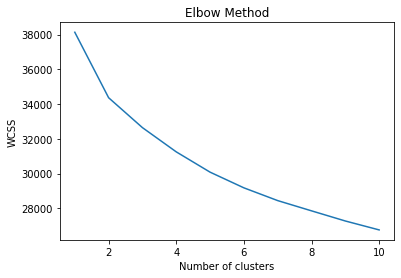

In [ ]:
# create an empty list to store WCSS values for each k
wcss = []

# fit k-means models for a range of k values
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_telecom)
    wcss.append(kmeans.inertia_)

# plot the WCSS values against k
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
# Initialize KMeans object with desired number of clusters
kmeans = KMeans(n_clusters=2)

# Fit the model to your data
kmeans.fit(df_telecom)
# kmeans1.fit(features)
# Predict the cluster labels for each data point
labels = kmeans.predict(df_telecom)
# labels1 = kmeans.predict(features)

# Get the coordinates of the cluster centroids
centroids = kmeans.cluster_centers_
# centroids1 = kmeans.cluster_centers_

In [ ]:
# Select the features for clustering
X = df_telecom[[i for i in df_telecom.columns if i not in target_col]]

# Perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(X)

# Add the cluster labels to the data
df_telecom['Cluster'] = clusters


In [ ]:
kmeans.cluster_centers_

array([[ 9.54545455e-02,  3.71900826e-03,  1.14243764e-02,
        -5.86923823e-01,  5.83526002e-03,  1.32191830e-02,
         1.00255991e-03,  7.84750047e-03, -9.50992588e-03,
        -1.02989999e-02,  5.49519159e-04, -6.77745322e-04,
         1.11610837e-02],
       [ 1.00766703e-01,  1.00000000e+00,  1.07315165e-02,
         1.57642404e+00,  4.29992067e-03, -1.21241767e-02,
         3.99233815e-02, -4.37813799e-03,  3.85849646e-03,
         2.75917392e-02, -1.10041232e-03,  1.97557483e-02,
        -2.89831614e-02]])

In [ ]:
kmeans.labels_

array([1, 1, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
pd.crosstab(df_telecom['Churn'], kmeans.labels_) #ทำนาย ว่า 0 ตรง 833 แต่ผิดพลาดไป 2017, ทำนายว่า 1 ตรง 403 ผิดไป 80

col_0,0,1
Churn,,
0,2017,833
1,403,80


In [ ]:
df_telecom.columns

Index(['International plan', 'Voice mail plan', 'Churn', 'Account length',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total eve minutes', 'Total eve calls', 'Total night minutes',
       'Total night calls', 'Total intl minutes', 'Total intl calls',
       'Customer service calls', 'Cluster'],
      dtype='object')

<Axes: xlabel='Total day minutes', ylabel='Total night minutes'>

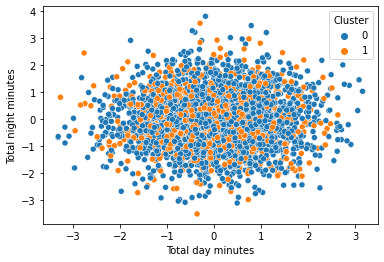

In [ ]:
import seaborn as sns

# Select the features to plot
x_feature = df_telecom['Total day minutes']
y_feature = df_telecom['Total night minutes']

# Plot the clusters using the selected features
sns.scatterplot(x=x_feature, y=y_feature, hue='Cluster', data=df_telecom)


In [ ]:
import plotly.express as px

fig = px.scatter_3d(df_telecom, x='Total day minutes', y='Total eve minutes', z='Total night minutes',color='Cluster', symbol='Churn', opacity=0.7)

fig.update_layout(scene=dict(xaxis_title='Total day minutes',
                             yaxis_title='Total eve minutes',
                             zaxis_title='Total night minutes'))

fig.show()


In [ ]:
import plotly.express as px

fig = px.scatter_3d(df_telecom, x='Total day minutes', y='Total eve minutes', z='Total night minutes', color='Cluster')
fig.show()
